In [12]:
import glob
import pandas as pd
import os
import sklearn.datasets as skdata
import numpy as np
#import time
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
from sklearn.metrics import confusion_matrix
#%matplotlib inline

In [30]:
from sklearn.metrics import f1_score

In [13]:
files=glob.glob("./Stocks/*.txt")
print(np.shape(files))
print(files[:20])

(7194,)
['./Stocks/ardc.us.txt', './Stocks/epix.us.txt', './Stocks/eab.us.txt', './Stocks/batra.us.txt', './Stocks/inbk.us.txt', './Stocks/bgx.us.txt', './Stocks/strt.us.txt', './Stocks/manh.us.txt', './Stocks/atus.us.txt', './Stocks/icbk.us.txt', './Stocks/ftnt.us.txt', './Stocks/nhld.us.txt', './Stocks/dfs.us.txt', './Stocks/scvl.us.txt', './Stocks/ing.us.txt', './Stocks/hope.us.txt', './Stocks/jpt.us.txt', './Stocks/ocfc.us.txt', './Stocks/gsk.us.txt', './Stocks/apog.us.txt']


In [81]:
# Solamente uso las columnas  x="high" y="nombre del archivo". Ejm

In [15]:
data = pd.read_csv("{}".format(files[0]),delimiter=",")
labels=data.keys()
print(labels)
print(np.shape(data))

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt'], dtype='object')
(1249, 7)


In [80]:
#las dimensiones son 1249 (cada compañía)

In [94]:
#tomo todos los elementos que no tengan celdas vacías
data[label[0]][1]

'2015-05-18'

In [107]:
n_max=1200#number of files taken
n_data=120# last days taken
#n_max=len(files)
X=[]
Y=[]
date=[]
cnt=0
for f in files[:n_max]:
    if(os.stat("{}".format(f)).st_size != 0):
        data = pd.read_csv("{}".format(f),delimiter=",")
        label=data.keys()
        if(len(data[label[0]])>119):
            X=np.append(X,data[label[2]][-n_data:])#toma todos los datos con high
            if(cnt==0):
                date=np.append(date,data[label[0]][-n_data:])#toma todos los dates
            cnt+=1
X=X.reshape(cnt,n_data)
#las categorías son los meses del año
for i in range(len(date)):
    for j in range(5,12):
        if("-0{}-".format(j) in date[i]):
            Y=np.append(Y,j)
        elif("-{}-".format(j) in date[i]):
            Y=np.append(Y,j)
print(np.shape(X))
print(np.shape(Y))

(1090, 120)
(120,)


In [108]:
print(len(date))
31863/120
print((Y))

120
[ 5.  5.  5.  5.  5.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.
  6.  6.  6.  6.  6.  6.  6.  6.  6.  7.  7.  7.  7.  7.  7.  7.  7.  7.
  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  8.  8.  8.  8.  8.  8.  8.
  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  9.  9.
  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 11. 11. 11. 11. 11. 11. 11. 11.]


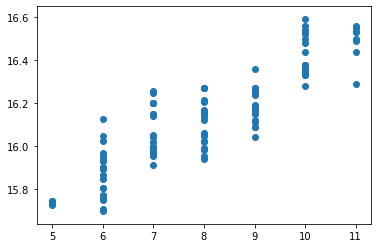

In [109]:
#Y
plt.scatter(Y,X[0,:])

In [82]:
# Vamos a hacer un split training test
scaler = StandardScaler()
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.5)


In [83]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
#y_train = scaler.fit_transform(y_train.reshape(-1, 1))
#y_test = scaler.transform(y_test.reshape(-1, 1))
print(np.shape(x_train))
print(np.shape(x_test))
print(np.shape(y_train))

(545, 120)
(545, 120)
(545,)


## para l1

In [68]:
# Turn up tolerance for faster convergence
train_samples = int(np.shape(Y)[0]*0.5)
#regresión logística sobre los dígitos
for i in np.log(np.arange(1,1000,10)):
    clf = LogisticRegression(
        C=i, penalty='l1', solver='saga', tol=0.1)
        #C=50. / train_samples, penalty='l1', solver='saga', tol=0.1)#,multi_class='multinomial'
    clf.fit(x_train, y_train)
    y_pred=clf.predict(x_test)
    print(f1_score(y_test,y_pred, average='weighted'))
#     sparsity = np.mean(clf.coef_ == 0) * 100
#     score = clf.score(x_test, y_test)
#     # print('Best C % .4f' % clf.C_)
#     print("Sparsity with L1 penalty: %.2f%%" % sparsity)
#     print("Test score with L1 penalty: %.4f" % score)

/home/john/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/john/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:974: RuntimeWarning: divide by zero encountered in double_scalars
  beta = 1. / C
/home/john/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/john/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/john/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_clas

0.0


/home/john/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/john/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/john/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/john/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.0


/home/john/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/john/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/john/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/john/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/john/anaconda3/lib/python3.7/site-packages/sklearn/linear_mo

0.0


/home/john/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/john/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/john/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/john/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.0


/home/john/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/john/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/john/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/john/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.0


/home/john/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/john/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/john/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/john/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.0


/home/john/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/john/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/john/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.0


/home/john/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/john/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/john/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/john/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/john/anaconda3/lib/python3.7/site-packages/sklearn/linear_mo

0.0


/home/john/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/john/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/john/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/john/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.0


/home/john/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/john/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/john/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/john/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.0


/home/john/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/john/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/john/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/john/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.0


/home/john/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/john/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/john/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/john/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.0


/home/john/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/john/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/john/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/john/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.0


/home/john/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/john/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/john/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/john/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.0


/home/john/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/john/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/john/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/john/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.0


KeyboardInterrupt: 

## para l2

In [78]:
# Turn up tolerance for faster convergence
train_samples = int(np.shape(Y)[0]*0.5)
#regresión logística sobre los dígitos
for i in np.log(np.arange(1,1000,10)):
    clf = LogisticRegression(
        C=i, penalty='l2', solver='saga', tol=0.1)
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    print(f1_score(y_test,y_pred, average='weighted'))
#     sparsity = np.mean(clf.coef_ == 0) * 100
#     score = clf.score(x_test, y_test)
#     # print('Best C % .4f' % clf.C_)
#     print("Sparsity with L1 penalty: %.2f%%" % sparsity)
#     print("Test score with L1 penalty: %.4f" % score)

/home/john/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Unknown label type: 'continuous'

In [37]:
print(np.shape(y_test))
print(np.shape(y_pred))

(569,)
(569,)


/home/john/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/john/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.0

# Discusión

Al aplicar umap se observa el agrupamiento de los elementos en un conjunto de líneas, en las cuales cada número está relacionado con el nombre de un mercado de la siguiente forma:

In [10]:
print("Mercado"," ","Número")
for i,f in enumerate(files[:n_max]):
    if(os.stat("{}".format(f)).st_size != 0):
        print(f[9:-4]," ",i)
 

Mercado   Número
ardc.us   0
epix.us   1
eab.us   2
batra.us   3
inbk.us   4
bgx.us   5
strt.us   6
manh.us   7
atus.us   8
icbk.us   9
ftnt.us   10
nhld.us   11
dfs.us   12
scvl.us   13
ing.us   14
hope.us   15
jpt.us   16
ocfc.us   17
gsk.us   18
apog.us   19
mlvf.us   20
ktn.us   21
stot.us   22
rcky.us   23
ldl.us   24
dlx.us   25
rtix.us   26
sb.us   27
hyb.us   28
ckh.us   29
gne.us   30
scacw.us   31
spb.us   32
eye.us   33
oilu.us   34
iii.us   35
fomx.us   36
yume.us   37
tpre.us   38
fran.us   39
krma.us   40
ale.us   41
bxp_b.us   42
mlp.us   43
amed.us   44
pmbc.us   45
ship.us   46
ergf.us   47
sonc.us   48
cw.us   49
ubs.us   50
orrf.us   51
race.us   52
evgbc.us   53
hsea.us   54
dcf.us   55
nfbk.us   56
agfs.us   57
clvs.us   58
uri.us   59
mkl.us   60
mnr.us   61
swin.us   62
lvus.us   63
sep.us   64
tpz.us   65
irdm.us   66
bracr.us   67
blph.us   68
spab.us   69
fixd.us   70
brg_d.us   71
bml_l.us   72
iret_b-cl.us   73
dl.us   74
ssi.us   75
kai.us   76
cveo.us   77

slnow.us   858
kura.us   859
msi.us   860
expd.us   861
nail.us   862
orex.us   863
nxq.us   864
tkr.us   865
exa.us   866
aht_f.us   867
fund.us   868
nghcz.us   869
hie.us   870
boot.us   871
irl.us   872
irwd.us   873
drua.us   874
chs.us   875
sypr.us   876
bzun.us   877
amrk.us   878
trup.us   879
isl.us   880
chh.us   881
ffhg.us   882
pdex.us   883
xusa.us   884
schk.us   885
tmk_b.us   886
zto.us   887
ffbcw.us   888
linc.us   889
cdtx.us   890
vjet.us   891
st.us   892
gtxi.us   893
tsn.us   894
peri.us   895
wbs_e.us   896
sgen.us   897
pump.us   898
tops.us   899
alt.us   900
etx.us   901
ebf.us   902
ipos.us   903
cmssu.us   904
tsla.us   905
vcra.us   906
nbr.us   907
ccor.us   908
trtx.us   909
smts.us   910
vmin.us   911
eri.us   912
camp.us   913
jsml.us   914
grow.us   915
ipcc.us   916
mne.us   917
hzo.us   918
gars.us   919
gsd.us   920
trtn.us   921
cdti.us   922
payx.us   923
abil.us   924
ofed.us   925
hrl.us   926
ashx.us   927
gst.us   928
ptf.us   929
nm.us   9

Se observa que al aumentar el número de vecinos cercanos se van formando líneas más "nítidas", de hecho para el caso neighbors=2 no se encuentra un agrupamiento, por otro lado, al aumentar la distancia "min_dist" se van haciendo más gruesas algunas partes de las líneas. Si miramos diferentes métricas, se observa que la métrica euclidiana separa los datos en líneas para un numero más pequeño de neighbors que en los otros casos.